In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
dat = np.load("datasets/dataset_cont_speccls_1_2_3.npz")["class_sig_list"]
print(dat.shape)
print(dat[0].shape)

(3, 2, 1000)
(2, 1000)


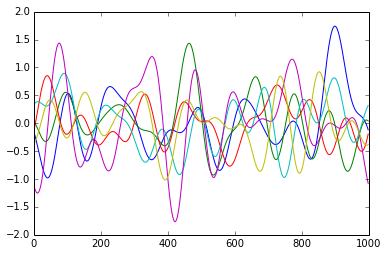

In [21]:
plt.plot(dat[0].T)
plt.plot(dat[1].T)
plt.plot(dat[2].T)

In [31]:
dat = np.load("datasets/dataset_disc_speccls_1_2_3.npz")["class_sig_list"]

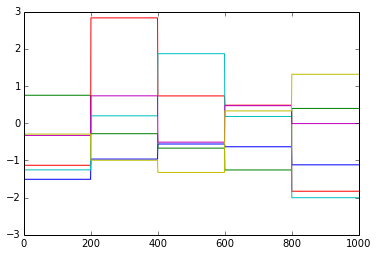

In [33]:
plt.plot(dat[0].T)
plt.plot(dat[1].T)
plt.plot(dat[2].T)

In [78]:
dat = np.load("datasets/dataset_orth_speccls_1_2_3_0.npz")["class_sig_list"]

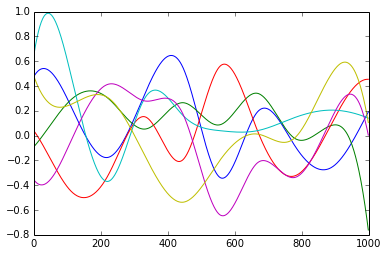

In [79]:
plt.plot(dat[0].T)
plt.plot(dat[1].T)
plt.plot(dat[2].T)

In [80]:
sig = dat[0][0, :].T
noise = np.random.normal(0, 1, size=sig.shape[0])
add = sig+noise
print(add.shape)
conv = np.convolve(sig, noise, mode="same")
print(conv.shape)

(1000,)
(1000,)


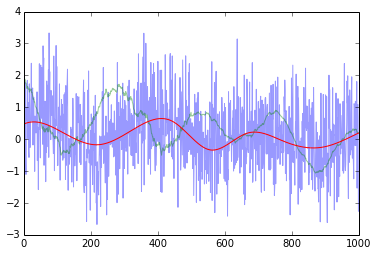

In [81]:
plt.plot(add, alpha=0.4)
plt.plot(conv/10, alpha=0.4)
plt.plot(sig)

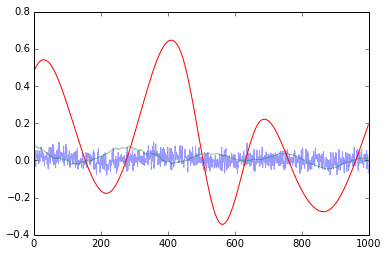

In [82]:
from numpy.linalg import norm

plt.plot(add/norm(add), alpha=0.4)
plt.plot(conv/norm(conv), alpha=0.4)
plt.plot(sig)

In [83]:
def d3_scale(dat, out_range=(-1, 1), in_range=None):
    if in_range == None:
        domain = [np.min(dat, axis=0), np.max(dat, axis=0)]
    else:
        domain = in_range

    def interp(x):
        return out_range[0] * (1.0 - x) + out_range[1] * x

    def uninterp(x):
        b = 0
        if (domain[1] - domain[0]) != 0:
            b = domain[1] - domain[0]
        else:
            b =  1.0 / domain[1]
        return (x - domain[0]) / b

    return interp(uninterp(dat))

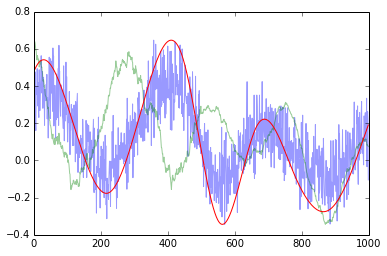

In [84]:
out_range = (np.min(sig), np.max(sig))
plt.plot(d3_scale(sig+noise/5.0, out_range=out_range), alpha=0.4)
plt.plot(d3_scale(conv, out_range=out_range), alpha=0.4)
plt.plot(sig)

In [103]:
new_dat = np.load("datasets/dataset_disc_speccls_1_2_3_0_aug_add_rand_noise.npz")["class_sig_list"]
dat = np.load("datasets/dataset_disc_speccls_1_2_3_0.npz")["class_sig_list"]

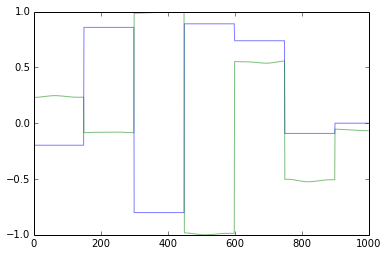

In [105]:
plt.plot(dat[0][0].T, alpha=0.5)
plt.plot(new_dat[0][0][0].T, alpha=0.5)

In [100]:
print(dat.shape)
print(new_dat.shape)

(3, 2, 1000)
(3, 2, 2, 1000)
